In [190]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils

import matplotlib.pyplot as plt

In [191]:
torch.manual_seed(0)

In [192]:
#generate the data
import random

n = 100 # number of replications
start_vector_size = 2
end_vector_size = 1

# Create an empty matrix
input_data = [[0] * start_vector_size for _ in range(n)]

output_data = [[0] * end_vector_size for _ in range(n)]

# Fill the matrix with random values
for i in range(n):
    for j in range(start_vector_size):
        input_data[i][j] = random.random()  # Generates a random value between 0 and 1
    output_data[i][0] = sum(input_data[i])
 #   output_data[i][1] = sum(input_data[i]) * 2

In [193]:
print(input_data[0],output_data[0])

[0.14595351985606397, 0.836634138278707] [0.982587658134771]


In [194]:
input_tensor = torch.Tensor(input_data)
output_tensor = torch.Tensor(output_data)
dataset = data_utils.TensorDataset(input_tensor,output_tensor)
dataset

In [195]:
# model = nn.Sequential(nn.Linear(8,8),nn.Linear(8,5),nn.Linear(5,2))
model = nn.Sequential(nn.Linear(start_vector_size,end_vector_size))

In [196]:
output = model(input_tensor)
output[0:4]

tensor([[-0.2654],
        [-0.5597],
        [-0.5723],
        [-0.3609]], grad_fn=<SliceBackward0>)

In [197]:
# create loss function and optimizer
criterion = nn.MSELoss()

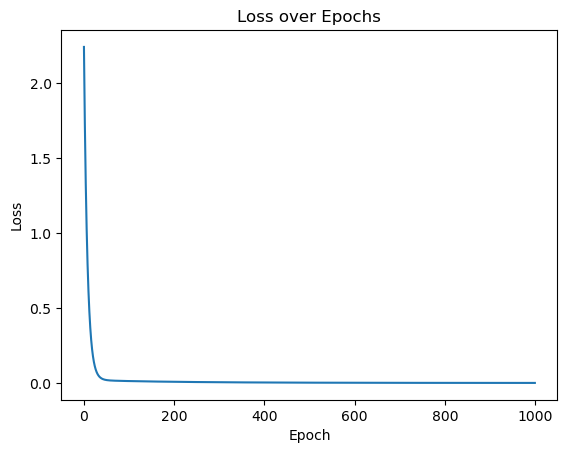

In [198]:
# Tuning parameters
training_batch_size = n #must be less than n
learning_rate = 0.02
num_epochs = 1000

dataloader = data_utils.DataLoader(dataset, batch_size=training_batch_size, shuffle=True)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_values = []

# Training the model
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for data in dataloader:
        optimizer.zero_grad()
        feature, target = data
        pred = model(feature)
        loss = criterion(pred, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()  # Accumulate the loss value

    # Calculate average loss per epoch
    epoch_loss /= len(dataloader)
    # Store the loss value
    loss_values.append(epoch_loss)

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [204]:
# compare model performance
print(model(input_tensor)[0:4])
print(output_tensor[0:4])

tensor([[0.9894],
        [0.8189],
        [0.8096],
        [1.3007]], grad_fn=<SliceBackward0>)
tensor([[0.9826],
        [0.8098],
        [0.8003],
        [1.3072]])


## Activation Functions

In [200]:
relu_pytorch = nn.ReLU()

In [201]:
x = torch.tensor(-1.0, requires_grad=True)


In [202]:
y = relu_pytorch(x)
y

tensor(0., grad_fn=<ReluBackward0>)

In [203]:
x.grad